In [1]:
import pandas as pd

# URL of the data file
data_url = 'https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'

# Read the data file
df = pd.read_csv(data_url)

# Display the first few rows of the dataframe
df.head()

,MajorText,MinorText,LookUp_BoroughName,202105,202106,202107,202108,202109,202110,202111,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202304
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,4,12,5,7,6,...,9,5,4,4,3,1,4,3,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,128,142,130,144,111,126,109,...,113,133,103,144,102,99,99,100,118,102
2,Burglary,Burglary Business and Community,Barking and Dagenham,30,24,21,29,27,37,20,...,18,30,30,27,22,23,28,18,35,36
3,Burglary,Domestic Burglary,Barking and Dagenham,81,66,61,87,62,83,87,...,46,76,75,82,68,87,94,39,56,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,7,6,11,17,18,12,...,18,12,10,10,13,12,15,12,27,24


In [2]:
# Check the unique values in the 'LookUp_BoroughName' and 'MinorText' columns
borough_names = df['LookUp_BoroughName'].unique()
crime_categories = df['MinorText'].unique()

borough_names, crime_categories

(array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
        'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
        'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
        'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
        'Kingston upon Thames', 'Lambeth', 'Lewisham',
        'London Heathrow and London City Airports', 'Merton', 'Newham',
        'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
        'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
       dtype=object),
 array(['Arson', 'Criminal Damage', 'Burglary Business and Community',
        'Domestic Burglary', 'Drug Trafficking', 'Possession of Drugs',
        'Bail Offences', 'Bigamy', 'Dangerous Driving',
        'Disclosure, Obstruction, False or Misleading State',
        'Exploitation of Prostitution',
        'Forgery or Use of Drug Prescription',
        'Fraud or Forgery Associated with Driver Records',
        'Going E

In [3]:
# Modify the filter to include 'Domestic Burglary'
filtered_df = df[(df['LookUp_BoroughName'] == 'Barnet') &
                 ((df['MinorText'] == 'Burglary Business and Community') |
                  (df['MinorText'] == 'Burglary Residential') |
                  (df['MinorText'] == 'Domestic Burglary'))]

# Display the filtered data
filtered_df

,MajorText,MinorText,LookUp_BoroughName,202105,202106,202107,202108,202109,202110,202111,...,202207,202208,202209,202210,202211,202212,202301,202302,202303,202304
51,Burglary,Burglary Business and Community,Barnet,24,52,41,42,34,38,46,...,57,32,55,51,69,57,56,56,53,57
52,Burglary,Domestic Burglary,Barnet,134,141,120,130,151,179,181,...,138,134,142,200,182,181,195,146,189,166


In [4]:
# Save the filtered data to a CSV file
filtered_df.to_csv('BarnetBurglaries.csv', index=False)

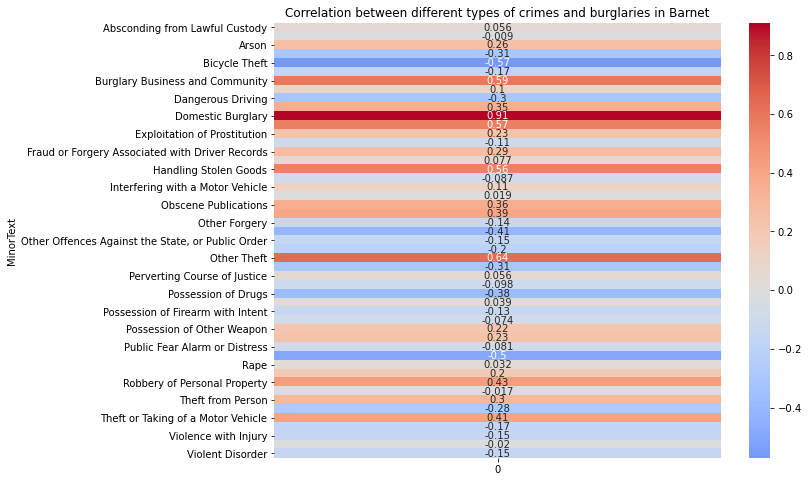

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the borough of Barnet
barnet_df = df[df['LookUp_BoroughName'] == 'Barnet']

# Pivot the dataframe to have crime categories as columns and their monthly counts as values
pivot_df = barnet_df.melt(id_vars=['MajorText', 'MinorText', 'LookUp_BoroughName'],
                            var_name='Month', value_name='Count')
pivot_df = pivot_df.pivot_table(index='Month', columns='MinorText', values='Count', fill_value=0)

# Calculate the correlation with the burglary categories
burglary_categories = ['Burglary Business and Community', 'Burglary Residential', 'Domestic Burglary']
burglary_categories = [category for category in burglary_categories if category in pivot_df.columns]
corr = pivot_df.corrwith(pivot_df[burglary_categories].mean(axis=1))

# Plot the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between different types of crimes and burglaries in Barnet')
plt.show()

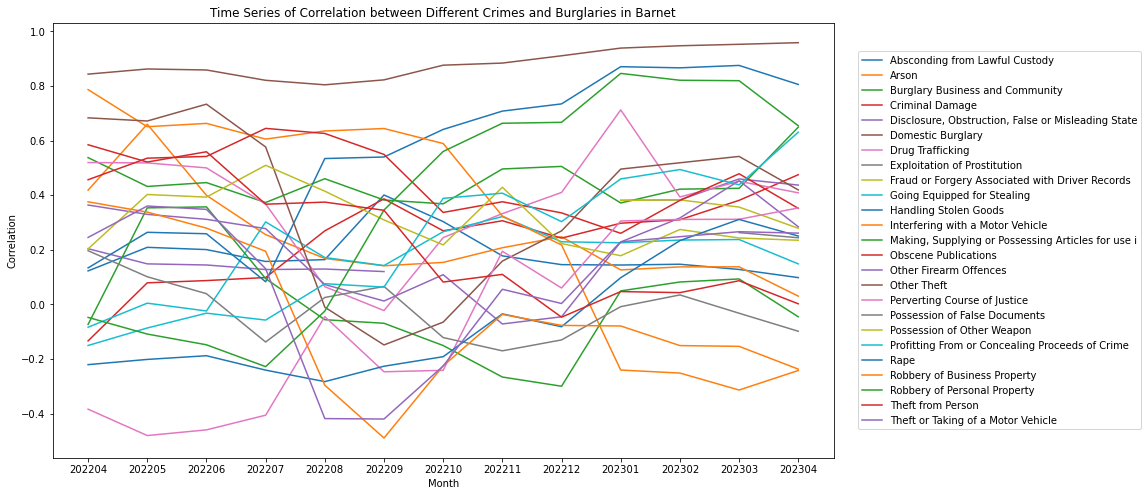

In [11]:
# Get the crimes that have a correlation above 0.0 with the burglary categories
correlated_crimes = corr[corr > 0.0].index.tolist()
# Calculate the monthly correlation with the burglary categories for each correlated crime
correlation_df = pd.DataFrame(index=pivot_df.index)
for crime in correlated_crimes:
    correlation_df[crime] = pivot_df[crime].rolling(window=12).corr(pivot_df[burglary_categories].mean(axis=1))

# Plot the time series for each correlated crime
plt.figure(figsize=(14, 8))
for crime in correlated_crimes:
    plt.plot(correlation_df.index, correlation_df[crime], label=crime)

plt.title('Time Series of Correlation between Different Crimes and Burglaries in Barnet')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.show()

In [7]:
# URL of the ward level data file
ward_data_url = 'https://data.london.gov.uk/download/recorded_crime_summary/866c05de-c5cd-454b-8fe5-9e7c77ea2313/MPS%20Ward%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'

# Read the ward level data file
ward_df = pd.read_csv(ward_data_url)

In [8]:
# Filter the data for the borough of Barnet
barnet_ward_df = ward_df[ward_df['LookUp_BoroughName'] == 'Barnet']

# Pivot the dataframe to have crime categories as columns and their monthly counts as values
pivot_ward_df = barnet_ward_df.melt(id_vars=['MajorText', 'MinorText', 'LookUp_BoroughName', 'WardName'],
                                     var_name='Month', value_name='Count')
pivot_ward_df = pivot_ward_df.pivot_table(index=['Month', 'WardName'], columns='MinorText', values='Count', fill_value=0)

# Calculate the correlation with the burglary categories for each ward
correlation_ward_df = pd.DataFrame(index=pivot_ward_df.index)
for ward in barnet_ward_df['WardName'].unique():
    ward_df = pivot_ward_df.xs(ward, level='WardName')
    for crime in correlated_crimes:
        correlation_ward_df.loc[(slice(None), ward), crime] = ward_df[crime].rolling(window=12).corr(ward_df[burglary_categories].mean(axis=1))

# Reset the index
correlation_ward_df.reset_index(inplace=True)

# Convert the 'Month' column to datetime format
correlation_ward_df['Month'] = pd.to_datetime(correlation_ward_df['Month'], format='%Y%m')

# Plot the time series for each correlated crime and each ward
plt.figure(figsize=(14, 8))
for ward in barnet_ward_df['WardName'].unique():
    ward_df = correlation_ward_df[correlation_ward_df['WardName'] == ward]
    for crime in correlated_crimes:
        plt.plot(ward_df['Month'], ward_df[crime], label=f'{crime} ({ward})')

plt.title('Time Series of Correlation between Different Crimes and Burglaries in Each Ward of Barnet')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.legend()
plt.show()

DataError: No numeric types to aggregate